In [1]:
# Import relevant functionality
from langchain_anthropic import ChatAnthropic
from langchain_community.tools.tavily_search import TavilySearchResults
from langchain_core.messages import HumanMessage
from langgraph.checkpoint.memory import MemorySaver
from langgraph.prebuilt import create_react_agent

In [4]:
search = TavilySearchResults(max_results=2)
search_results = search.invoke("what is the weather in London")


In [7]:
search_results

[{'url': 'https://www.weatherapi.com/',
  'content': "{'location': {'name': 'London', 'region': 'City of London, Greater London', 'country': 'United Kingdom', 'lat': 51.5171, 'lon': -0.1062, 'tz_id': 'Europe/London', 'localtime_epoch': 1735585755, 'localtime': '2024-12-30 19:09'}, 'current': {'last_updated_epoch': 1735585200, 'last_updated': '2024-12-30 19:00', 'temp_c': 9.4, 'temp_f': 48.9, 'is_day': 0, 'condition': {'text': 'Overcast', 'icon': '//cdn.weatherapi.com/weather/64x64/night/122.png', 'code': 1009}, 'wind_mph': 8.1, 'wind_kph': 13.0, 'wind_degree': 232, 'wind_dir': 'SW', 'pressure_mb': 1026.0, 'pressure_in': 30.3, 'precip_mm': 0.0, 'precip_in': 0.0, 'humidity': 76, 'cloud': 100, 'feelslike_c': 7.5, 'feelslike_f': 45.4, 'windchill_c': 4.1, 'windchill_f': 39.4, 'heatindex_c': 6.7, 'heatindex_f': 44.0, 'dewpoint_c': 5.1, 'dewpoint_f': 41.1, 'vis_km': 10.0, 'vis_miles': 6.0, 'uv': 0.0, 'gust_mph': 13.3, 'gust_kph': 21.4}}"},
 {'url': 'https://www.weather25.com/europe/united-kin

In [10]:
search_results[0]

{'url': 'https://www.weatherapi.com/',
 'content': "{'location': {'name': 'London', 'region': 'City of London, Greater London', 'country': 'United Kingdom', 'lat': 51.5171, 'lon': -0.1062, 'tz_id': 'Europe/London', 'localtime_epoch': 1735585755, 'localtime': '2024-12-30 19:09'}, 'current': {'last_updated_epoch': 1735585200, 'last_updated': '2024-12-30 19:00', 'temp_c': 9.4, 'temp_f': 48.9, 'is_day': 0, 'condition': {'text': 'Overcast', 'icon': '//cdn.weatherapi.com/weather/64x64/night/122.png', 'code': 1009}, 'wind_mph': 8.1, 'wind_kph': 13.0, 'wind_degree': 232, 'wind_dir': 'SW', 'pressure_mb': 1026.0, 'pressure_in': 30.3, 'precip_mm': 0.0, 'precip_in': 0.0, 'humidity': 76, 'cloud': 100, 'feelslike_c': 7.5, 'feelslike_f': 45.4, 'windchill_c': 4.1, 'windchill_f': 39.4, 'heatindex_c': 6.7, 'heatindex_f': 44.0, 'dewpoint_c': 5.1, 'dewpoint_f': 41.1, 'vis_km': 10.0, 'vis_miles': 6.0, 'uv': 0.0, 'gust_mph': 13.3, 'gust_kph': 21.4}}"}

In [11]:
search_results[1]

{'url': 'https://www.weather25.com/europe/united-kingdom/london?page=month&month=December',
 'content': 'Full weather forecast for London in December 2024. Check the temperatures, chance of rain and more in London during December. United States England Australia Canada °F °C. London . Weather outlook for December 2024 . Overview ; 14 Days ; ... 30. 8 ° / 5 ° 31. 11 ° / 6 °'}

In [12]:
tools = [search]

In [15]:
from langchain_openai import ChatOpenAI

model = ChatOpenAI(model="gpt-4")
model

ChatOpenAI(client=<openai.resources.chat.completions.Completions object at 0xffff999e93d0>, async_client=<openai.resources.chat.completions.AsyncCompletions object at 0xffff999f1890>, root_client=<openai.OpenAI object at 0xffff999c2790>, root_async_client=<openai.AsyncOpenAI object at 0xffff99d35e10>, model_name='gpt-4', model_kwargs={}, openai_api_key=SecretStr('**********'))

In [18]:
from langchain_core.messages import HumanMessage

response = model.invoke([HumanMessage(content="hi!")])
response

AIMessage(content='Hello! How can I assist you today?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 10, 'prompt_tokens': 9, 'total_tokens': 19, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4-0613', 'system_fingerprint': None, 'finish_reason': 'stop', 'logprobs': None}, id='run-897fcc2b-50ca-4889-92fb-723a05c5886a-0', usage_metadata={'input_tokens': 9, 'output_tokens': 10, 'total_tokens': 19, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})

In [19]:
response.content

'Hello! How can I assist you today?'

In [20]:
model_with_tools  = model.bind_tools(tools)
model_with_tools

RunnableBinding(bound=ChatOpenAI(client=<openai.resources.chat.completions.Completions object at 0xffff999e93d0>, async_client=<openai.resources.chat.completions.AsyncCompletions object at 0xffff999f1890>, root_client=<openai.OpenAI object at 0xffff999c2790>, root_async_client=<openai.AsyncOpenAI object at 0xffff99d35e10>, model_name='gpt-4', model_kwargs={}, openai_api_key=SecretStr('**********')), kwargs={'tools': [{'type': 'function', 'function': {'name': 'tavily_search_results_json', 'description': 'A search engine optimized for comprehensive, accurate, and trusted results. Useful for when you need to answer questions about current events. Input should be a search query.', 'parameters': {'properties': {'query': {'description': 'search query to look up', 'type': 'string'}}, 'required': ['query'], 'type': 'object'}}}]}, config={}, config_factories=[])

In [21]:
model

ChatOpenAI(client=<openai.resources.chat.completions.Completions object at 0xffff999e93d0>, async_client=<openai.resources.chat.completions.AsyncCompletions object at 0xffff999f1890>, root_client=<openai.OpenAI object at 0xffff999c2790>, root_async_client=<openai.AsyncOpenAI object at 0xffff99d35e10>, model_name='gpt-4', model_kwargs={}, openai_api_key=SecretStr('**********'))

In [22]:
r = model_with_tools.invoke([HumanMessage(content="Hi")])
r.content, r.tool_calls

('Hello! How can I assist you today?', [])

In [23]:
r = model_with_tools.invoke([HumanMessage(content="What's the weather in London?")])

In [26]:
r

AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_bLSf78UdgH3kdzCxyQV7BNKT', 'function': {'arguments': '{\n  "query": "current weather in London"\n}', 'name': 'tavily_search_results_json'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 23, 'prompt_tokens': 88, 'total_tokens': 111, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4-0613', 'system_fingerprint': None, 'finish_reason': 'tool_calls', 'logprobs': None}, id='run-e34fd3f1-fddf-4686-bd07-a2c6ddd15e2d-0', tool_calls=[{'name': 'tavily_search_results_json', 'args': {'query': 'current weather in London'}, 'id': 'call_bLSf78UdgH3kdzCxyQV7BNKT', 'type': 'tool_call'}], usage_metadata={'input_tokens': 88, 'output_tokens': 23, 'total_tokens': 111, 'input_token_details': {'audio': 0, 'cache_read':

In [27]:
r.content

''

In [28]:
r.tool_calls

[{'name': 'tavily_search_results_json',
  'args': {'query': 'current weather in London'},
  'id': 'call_bLSf78UdgH3kdzCxyQV7BNKT',
  'type': 'tool_call'}]

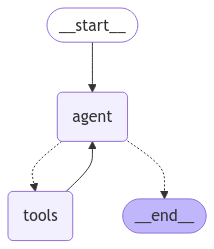

In [29]:
from langgraph.prebuilt import create_react_agent

agent_executor = create_react_agent(model, tools)
agent_executor

In [30]:
r = agent_executor.invoke({"messages": [HumanMessage(content="hi")]})
r

{'messages': [HumanMessage(content='hi', additional_kwargs={}, response_metadata={}, id='f339b981-9bbc-4699-8be5-f9e3cb91acd3'),
  AIMessage(content='Hello! How can I assist you today?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 11, 'prompt_tokens': 82, 'total_tokens': 93, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4-0613', 'system_fingerprint': None, 'finish_reason': 'stop', 'logprobs': None}, id='run-8a99e286-6736-4ab9-89d0-fb7036363310-0', usage_metadata={'input_tokens': 82, 'output_tokens': 11, 'total_tokens': 93, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})]}

In [32]:
r["messages"]

[HumanMessage(content='hi', additional_kwargs={}, response_metadata={}, id='f339b981-9bbc-4699-8be5-f9e3cb91acd3'),
 AIMessage(content='Hello! How can I assist you today?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 11, 'prompt_tokens': 82, 'total_tokens': 93, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4-0613', 'system_fingerprint': None, 'finish_reason': 'stop', 'logprobs': None}, id='run-8a99e286-6736-4ab9-89d0-fb7036363310-0', usage_metadata={'input_tokens': 82, 'output_tokens': 11, 'total_tokens': 93, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})]

In [33]:
r = agent_executor.invoke(
    {"messages": [HumanMessage(content="What's the weather in Beijing?")]}
)
r["messages"]

[HumanMessage(content="What's the weather in Beijing?", additional_kwargs={}, response_metadata={}, id='d6dedaa5-30b4-47f3-b6e4-7e8ad35bbf65'),
 AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_x1qy5uavZ0IBtowKeGbnW4ip', 'function': {'arguments': '{\n  "query": "current weather in Beijing"\n}', 'name': 'tavily_search_results_json'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 23, 'prompt_tokens': 88, 'total_tokens': 111, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4-0613', 'system_fingerprint': None, 'finish_reason': 'tool_calls', 'logprobs': None}, id='run-43eafb09-8bd2-4345-90a7-dfa627d1be16-0', tool_calls=[{'name': 'tavily_search_results_json', 'args': {'query': 'current weather in Beijing'}, 'id': 'call_x1qy5uavZ0IBtowKeGbnW4ip', 'ty

In [38]:
print(r["messages"][2].content)

[{"url": "https://www.weatherapi.com/", "content": "{'location': {'name': 'Beijing', 'region': 'Beijing', 'country': 'China', 'lat': 39.9289, 'lon': 116.3883, 'tz_id': 'Asia/Shanghai', 'localtime_epoch': 1735595866, 'localtime': '2024-12-31 05:57'}, 'current': {'last_updated_epoch': 1735595100, 'last_updated': '2024-12-31 05:45', 'temp_c': -1.2, 'temp_f': 29.8, 'is_day': 0, 'condition': {'text': 'Clear', 'icon': '//cdn.weatherapi.com/weather/64x64/night/113.png', 'code': 1000}, 'wind_mph': 2.5, 'wind_kph': 4.0, 'wind_degree': 318, 'wind_dir': 'NW', 'pressure_mb': 1027.0, 'pressure_in': 30.32, 'precip_mm': 0.0, 'precip_in': 0.0, 'humidity': 38, 'cloud': 7, 'feelslike_c': -2.4, 'feelslike_f': 27.6, 'windchill_c': -2.4, 'windchill_f': 27.6, 'heatindex_c': -1.3, 'heatindex_f': 29.8, 'dewpoint_c': -13.6, 'dewpoint_f': 7.4, 'vis_km': 10.0, 'vis_miles': 6.0, 'uv': 0.0, 'gust_mph': 3.9, 'gust_kph': 6.3}}"}, {"url": "https://www.easeweather.com/asia/china/beijing/december", "content": "So far, 

In [39]:
from langgraph.checkpoint.memory import MemorySaver

memory = MemorySaver()


In [40]:
agent_executor = create_react_agent(model, tools, checkpointer=memory)
config = {"configurable": {"thread_id": "abc123"}}


In [41]:
for chunk in agent_executor.stream(
    {"messages": [HumanMessage(content="hi Im Bob")]}, config
):
    print(chunk)
    print("----")

{'agent': {'messages': [AIMessage(content='Hello Bob! How can I assist you today?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 12, 'prompt_tokens': 84, 'total_tokens': 96, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4-0613', 'system_fingerprint': None, 'finish_reason': 'stop', 'logprobs': None}, id='run-14eb4ed2-cb08-44d7-a278-43e3ad0ee4a5-0', usage_metadata={'input_tokens': 84, 'output_tokens': 12, 'total_tokens': 96, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})]}}
----


In [42]:
for chunk in agent_executor.stream(
    {"messages": [HumanMessage(content="What's my name?")]}, config
):
    print(chunk)
    print("----")

{'agent': {'messages': [AIMessage(content='Your name is Bob.', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 7, 'prompt_tokens': 107, 'total_tokens': 114, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4-0613', 'system_fingerprint': None, 'finish_reason': 'stop', 'logprobs': None}, id='run-2a4eb9c1-0b12-484b-a3c9-aa1e077ca8ae-0', usage_metadata={'input_tokens': 107, 'output_tokens': 7, 'total_tokens': 114, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})]}}
----


In [43]:
for chunk in agent_executor.stream(
    {"messages": [HumanMessage(content="I currently live in NYC")]}, config
):
    print(chunk)
    print("----")

{'agent': {'messages': [AIMessage(content="That's great, Bob! New York City is a vibrant place. How can I assist you further?", additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 23, 'prompt_tokens': 125, 'total_tokens': 148, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4-0613', 'system_fingerprint': None, 'finish_reason': 'stop', 'logprobs': None}, id='run-dc0149f4-cb54-4349-82d2-44964e4834d3-0', usage_metadata={'input_tokens': 125, 'output_tokens': 23, 'total_tokens': 148, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})]}}
----


In [44]:
for chunk in agent_executor.stream(
    {"messages": [HumanMessage(content="What's the weather in my current location?")]}, config
):
    print(chunk)
    print("----")

{'agent': {'messages': [AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_raDL0j93379LihNmIr97hgod', 'function': {'arguments': '{\n  "query": "current weather in NYC"\n}', 'name': 'tavily_search_results_json'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 23, 'prompt_tokens': 163, 'total_tokens': 186, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4-0613', 'system_fingerprint': None, 'finish_reason': 'tool_calls', 'logprobs': None}, id='run-3dde9bdc-f7bb-4845-bd60-b3937495b18e-0', tool_calls=[{'name': 'tavily_search_results_json', 'args': {'query': 'current weather in NYC'}, 'id': 'call_raDL0j93379LihNmIr97hgod', 'type': 'tool_call'}], usage_metadata={'input_tokens': 163, 'output_tokens': 23, 'total_tokens': 186, 'input_token_details': {'audi

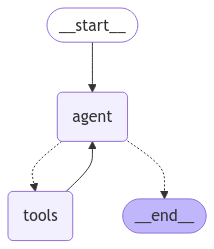

In [49]:
agent_executor

In [48]:
tools

[TavilySearchResults(max_results=2, api_wrapper=TavilySearchAPIWrapper(tavily_api_key=SecretStr('**********')))]